> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigatation of No Show Appointments - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> For this analysis I have selected a dataset of information from 100k medical appointments in Brazil and whether or not the patients showed up for their scheduled appointment.

> Columns included are:

>*PatientID - A unique numerical identifier for each patient

>*AppointmentID - A unique numerical identifier for each appointment

>*Gender - Reported gender of the patient

>*ScheduledDay - The date on which the appointment was scheduled

>*AppointmentDay - The date of the actual appointment

>*Age - Age of the patient

>*Neighbourhood - Location of the clinic

>*Scholarship - If the patient had a scholarship to pay for medical expenses

>*Hipertension - If the patient has a history of hypertension

>*Diabetes - If the patient has a history of diabetes

>*Alcoholism - If the patient has a history of alcoholism

>*Handcap - If the patient is handicapped

>*SMS-received - If the patient received an SMS message prior to the appointment

>*No-Show - If the patient showed up at the appointment. A 'Yes' marker indicates they were a no-show and were not at the appointment. A 'No' marker indicates they did attend the appointment.

### Question(s) for Analysis
>In this analysis I will be investigating whether different variables are correlated with a no-show appointment. I will specifically be looking at the age, alcoholism, and whether or not an SMS was recieved.



In [36]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> I will begin my analysis by loading the required data and exploring it through various methods.



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>In this cell I loaded the information and showed that it loaded to correctly.

In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.duplicated().sum()

0

>I investigated the data and discovered there were no missing entries. I also confirmed that there was no duplicate data.


### Data Cleaning
> In this session I began cleaning the data so that I could use it more effectively for analysis.
 

In [8]:
df.columns = df.columns.str.replace("-", "_")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>The data is structured with a few different data types. The ones I will be focusing on are type INT with the exception of the No_show column. Originally the column had a hypen instead of an underscore. This caused an issue in that to the program it looked like a mathmatical operation. I corrected this. There also was the issue of more data than was actually necessary for me to make my conclusions. Unnecessary columns were dropped.

In [9]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>I dropped the columns that I would not need going forward. As I am looking at the correlation between age, SMS received, and alcoholism, I did not feel that the PatientID, AppointmentID, ScheduledDay, and AppointmentDay fields were necessary.

In [10]:
df = df.replace('No', '0')
df = df.replace('Yes', '1')

In [11]:
df.No_show = df.No_show.astype(int)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No_show          110527 non-null int64
dtypes: int64(8), object(2)
memory usage: 8.4+ MB


>I changed the string values in the No_show column to INT type. By changing the values from string to numeric I was more easily able to do visualizations.

In [13]:
noshow = df.No_show == True
show = df.No_show == False

>I created aliases to make coding easier going forward.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section I will explore whether or not other factors can be correlated to a patient attending a scheduled appointment.

>I will be doing two visualizations for each question in an effort to show a correlation. 



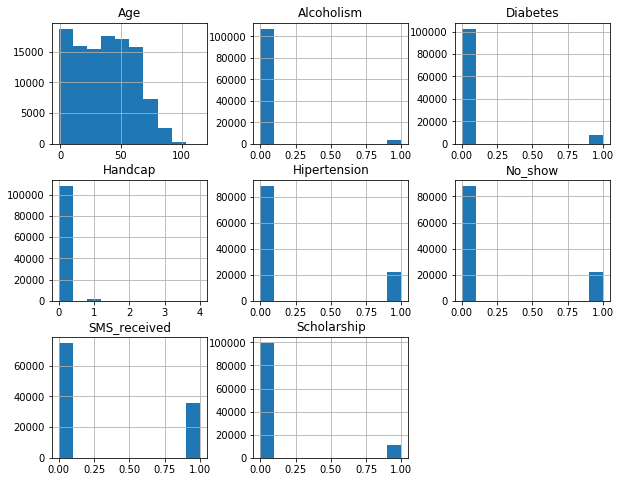

In [14]:
df.hist(figsize=(10,8));

>General histograms showing all data that remains in the file after unneccessary columns have been dropped.

In [15]:
def myboxplot(var1):
        df.boxplot(column=[var1], by=['No_show'], rot=90)
        plt.ylabel(var1)
        pd.DataFrame(df.groupby(['No_show'])[var1].describe().loc[:,['mean', 'std']])


>Function to simplify creating boxplots

In [42]:
def mybarplot(var1):
    df.groupby([var1])[['No_show']].mean().plot(kind='bar').set_ylabel('No show ratio')
    df.groupby([var1])[['No_show']].mean()

In [16]:
def myscatter(var1, var2):
    df.plot(var1, var2, kind="scatter");

>Function to simplify creating scatter plots

### Is age correlated to whether or not a patient attends a scheduled appointment?

,mean,std
No_show,,
0,37.790064,23.338878
1,34.317667,21.965941


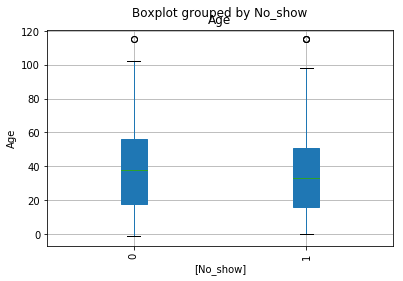

In [39]:
df.boxplot(column=['Age'], by=['No_show'], rot=90, patch_artist=True)
plt.ylabel("Age")
pd.DataFrame(df.groupby(['No_show'])['Age'].describe().loc[:,['mean', 'std']])

>This boxplot does not show a significant difference between those that showed up and those that did not in relation to their age.

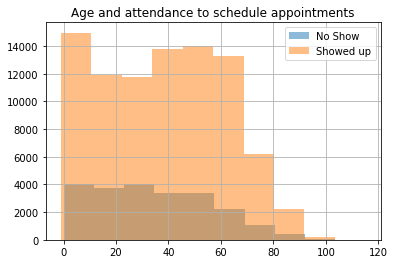

In [27]:
df.Age[noshow].hist(alpha=0.5, label='No Show')
df.Age[show].hist(alpha=0.5, label='Showed up')
plt.title("Age and attendance to schedule appointments")
plt.legend();

>This histogram does not display any significant correlation between age and attendance.


### Is Alcoholism correlated to whether or not a patient showed up to an appointment?


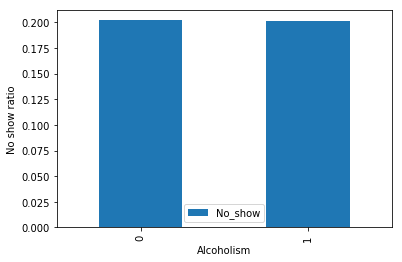

In [43]:
mybarplot('Alcoholism');

>This bar chart shows that the proportion of those that did not show up and those that did in relation to whether or not they have alcoholism is about equal. 

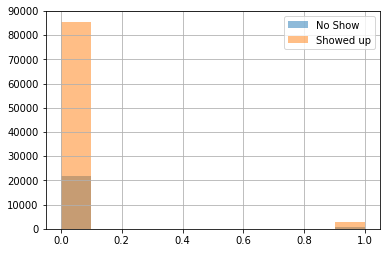

In [38]:
df.Alcoholism[noshow].hist(alpha=0.5, label='No Show')
df.Alcoholism[show].hist(alpha=0.5, label='Showed up')
plt.legend();

>This histogram appears to show more of a relationship between not attending an appointment and not having a marker for alcoholism. 


### Did receiving an SMS message have an effect on whether or not a patient attended their appointment?

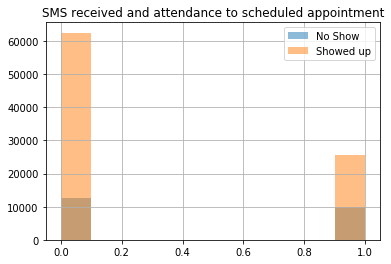

In [31]:
df.SMS_received[noshow].hist(alpha=0.5, label='No Show')
df.SMS_received[show].hist(alpha=0.5, label='Showed up')
plt.legend()
plt.title("SMS received and attendance to scheduled appointment");

>In this histogram there is a greater proportion of the people that recieved an SMS that also did not attend the appointment. 

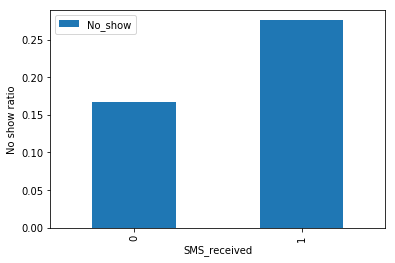

In [44]:
mybarplot('SMS_received')

>This bar chart shows that there is a higher proportion of those that did receive an SMS message in relation to whether or not they were a no show. This is inline with what the histogram depicted.

<a id='conclusions'></a>
## Conclusions

> Based on the visualizations, I do not see a correlation between either alcoholism or age in regard to whether or not a patient attended the appointment. I did find a slight correlation between receiving an SMS message and being a no show.

### Limitation
> I feel that my primary limitation is a lack of knowledge in how to best explore data that only includes two possible values. The methods I am familar with seem to work better with a range of data as opposed to only two values. I feel this is evident in the scatter plots which did not seem to provide much information. 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> Based on what is covered in this course, would there have been a better method for visualizations of the variables with only two values, such as alcoholism?

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0